In [1]:
%load_ext autoreload
%autoreload 2
import os

In [92]:
# Defining globals
LOG_ROOT_PATH = '/home/jdunnmon/Research/repos/Emmental-ChexNet/logs'
#LOG_SLICE_NAME = 'log_abnorm_ml_slices/2019_07_13/00_15_32'
LOG_SLICE_NAME = 'log_ml_slicing_hps/2019_07_14/16_08_14'
#LOG_BASE_NAME =  'log_abnorm_base_ml_slice/2019_07_13/12_03_57'
LOG_BASE_NAME = 'log_triage_base_hps/2019_07_14/17_01_18'
SAVE_RES = False

In [93]:
# Defining log paths
log_base_path = os.path.join(LOG_ROOT_PATH,LOG_BASE_NAME)
log_slice_path = os.path.join(LOG_ROOT_PATH, LOG_SLICE_NAME)

In [94]:
# Loading files
from utils import load_results_from_log
base_results = load_results_from_log(log_base_path)
slice_results = load_results_from_log(log_slice_path)

In [95]:
base_metrics = base_results['metrics']
slice_metrics = slice_results['metrics']

In [96]:
from utils import get_metric_attrs
def get_df_from_results(metrics_dict, dataset, split, plot_metric, slices=[]):
    dct = {}
    for ky,val in metrics_dict.items():
        if ky == plot_metric:
            dct['Overall'] = val
        elif ':' in ky:
            tsk, slc, dataset, split, metric = get_metric_attrs(ky)
            if (metric == plot_metric) and (split == split) and (dataset == dataset):
                if (slices == []) or slc in slices:
                    dct[slc] = val
    return dct

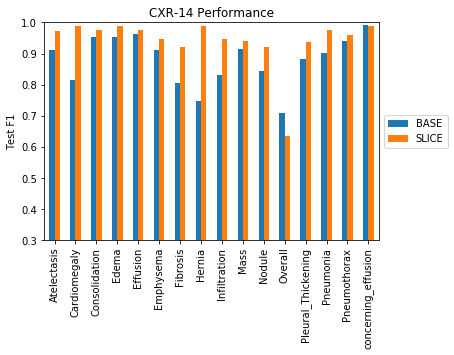

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

plot_metric='f1'
slice_df = get_df_from_results(slice_metrics, 'CXR8', 'test', plot_metric)
base_df = get_df_from_results(base_metrics, 'CXR8', 'test', plot_metric)
df_plot = pd.DataFrame({'BASE':base_df,'SLICE':slice_df})

f = plt.figure(plot_metric)
plt.title('CXR-14 Performance', color='black')
plt.ylabel(f'Test {plot_metric.upper()}')
plot = df_plot.plot(kind='bar', ax=f.gca(),rot=90)
plot.set_xlabel('')
if plot_metric == 'roc-auc':
    plot.set_ylim([0.7, 1.0])
else:
    plot.set_ylim([0.3, 1.0])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
if SAVE_RES:
    plt.savefig(f'../figures/CXR14-performance-{plot_metric}.png',format='png', bbox_inches='tight')
plt.show()